In [21]:
import pandas as pd
import numpy as np
import proplot as plot
import copy

In [2]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [6]:
names = ['type', 'timestamp', 'latitude', 'longitude']
types = ['int', 'str', 'float', 'float']
dtypes = dict(zip(names, types))

In [7]:
entln = pd.read_csv('./ENGLN_20200901_nomerge.csv', delimiter=',', dtype=dtypes, parse_dates=['timestamp'], skipinitialspace=True)[['type', 'timestamp', 'latitude', 'longitude']]
cldn = pd.read_csv('./CLDN_20200901.csv', delimiter=',', dtype=dtypes, parse_dates=['timestamp'], skipinitialspace=True)

In [8]:
entln.shape

(1282448, 4)

In [9]:
cldn.shape

(50822, 5)

In [10]:
cldn

,Unnamed: 0,longitude,latitude,timestamp,type
0,0,127.50,29.06,2020-09-01 00:00:26,0
1,1,112.33,21.24,2020-09-01 00:02:01,0
2,2,112.11,21.56,2020-09-01 00:02:01,0
3,3,112.90,20.71,2020-09-01 00:02:09,0
4,4,113.86,34.40,2020-09-01 00:02:45,0
...,...,...,...,...,...
50817,50817,123.35,28.82,2020-09-01 23:58:37,0
50818,50818,108.87,19.73,2020-09-01 23:59:00,0
50819,50819,108.81,19.75,2020-09-01 23:59:22,0
50820,50820,108.31,29.34,2020-09-01 23:59:32,0


In [11]:
for i in range(entln.shape[0]):
    lat   = entln.iloc[i,:].latitude
    lat_1 = lat - 0.5
    lat_2 = lat + 0.5

    lon   = entln.iloc[i,:].longitude
    lon_1 = lon - 0.5
    lon_2 = lon + 0.5
    
    mask_1 = (lon_1 < cldn.longitude) & (cldn.longitude < lon_2) & \
                (lat_1 < cldn.latitude) & (cldn.latitude < lat_2)

    mask_2 = (cldn['timestamp'] >= entln.iloc[i,:]['timestamp'] - pd.Timedelta(seconds=1)) & \
                (cldn['timestamp'] < entln.iloc[i,:]['timestamp'] + pd.Timedelta(seconds=1))

    if any(mask_1 & mask_2):
        for index, row in cldn[mask_1&mask_2].infer_objects().iterrows():
            if haversine(row['longitude'], row['latitude'], lon, lat) < 25:
                cldn = cldn.drop(index)

In [12]:
cldn

,Unnamed: 0,longitude,latitude,timestamp,type
0,0,127.50,29.06,2020-09-01 00:00:26,0
3,3,112.90,20.71,2020-09-01 00:02:09,0
4,4,113.86,34.40,2020-09-01 00:02:45,0
5,5,120.87,21.60,2020-09-01 00:03:12,0
7,7,112.89,20.50,2020-09-01 00:04:08,0
...,...,...,...,...,...
50789,50789,125.35,28.81,2020-09-01 23:50:38,0
50804,50804,111.71,12.57,2020-09-01 23:55:45,0
50808,50808,115.48,36.85,2020-09-01 23:56:10,0
50817,50817,123.35,28.82,2020-09-01 23:58:37,0


In [13]:
df = pd.concat([entln, cldn], ignore_index=True)
df

,type,timestamp,latitude,longitude,Unnamed: 0
0,0,2020-09-01 00:00:00.127057791,19.74629,86.97155,NaN
1,0,2020-09-01 00:00:00.240191936,19.74420,86.96926,NaN
2,0,2020-09-01 00:00:00.033620358,19.94142,90.52048,NaN
3,0,2020-09-01 00:00:00.243512869,19.92368,90.50303,NaN
4,0,2020-09-01 00:00:00.371254683,19.89503,90.52038,NaN
...,...,...,...,...,...
1290933,0,2020-09-01 23:50:38.000000000,28.81000,125.35000,50789.0
1290934,0,2020-09-01 23:55:45.000000000,12.57000,111.71000,50804.0
1290935,0,2020-09-01 23:56:10.000000000,36.85000,115.48000,50808.0
1290936,0,2020-09-01 23:58:37.000000000,28.82000,123.35000,50817.0


In [16]:
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

In [18]:
df

,type,timestamp,latitude,longitude
0,0,2020-09-01 00:00:00.127057791,19.74629,86.97155
1,0,2020-09-01 00:00:00.240191936,19.74420,86.96926
2,0,2020-09-01 00:00:00.033620358,19.94142,90.52048
3,0,2020-09-01 00:00:00.243512869,19.92368,90.50303
4,0,2020-09-01 00:00:00.371254683,19.89503,90.52038
...,...,...,...,...
1290933,0,2020-09-01 23:50:38.000000000,28.81000,125.35000
1290934,0,2020-09-01 23:55:45.000000000,12.57000,111.71000
1290935,0,2020-09-01 23:56:10.000000000,36.85000,115.48000
1290936,0,2020-09-01 23:58:37.000000000,28.82000,123.35000


In [19]:
df.to_csv("../data/ENGLN_20200901.csv", mode="a", header=True, index=False)

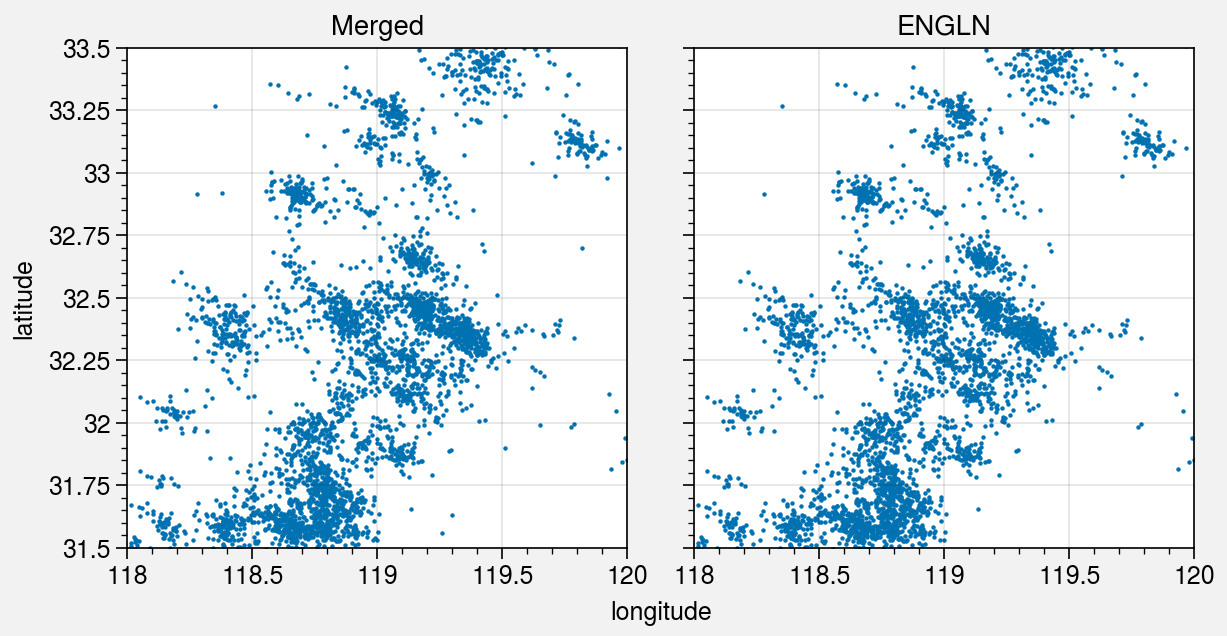

In [23]:
fig, axs = plot.subplots(ncols=2)

axs[0].scatter(df['longitude'], df['latitude'], size=1)
axs[0].format(title='Merged')
axs[1].scatter(entln['longitude'], entln['latitude'], size=1)
axs[1].format(title='ENGLN')


axs.format(xlim=(118, 120), ylim=(31.5, 33.5))